# Week 10 - Neural Networks

## Representing Logic Gates as a Classification Problem
---

Logic gates can be modeled as a classification problem where the input data point is classified into either class '0' representing boolean output 0 or class '1' representing boolean output 1.

![alt text](https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Logic-Gates.png)

<br> For example, the following figure shows how AND gate can be represented as a classification problem. <br>

![and-gate-classification](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6HtfY93_f0PLy-MS5UTogRNmrtptQsU3iHXEbQd4_q79eRfVd)

<br> The figure shows one possible decision boundary that will perform the task. 

In [3]:
# Required Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### 1) Using logistic regression implement OR gate such that $\hat{y} = OR(x_1, x_2)$ where $x_1$ and $x_2$ are boolean inputs to the gate and $\hat{y}$ is the boolean output from the gate. Plot the data points and the decision boundary, mention which class each decision region represents.

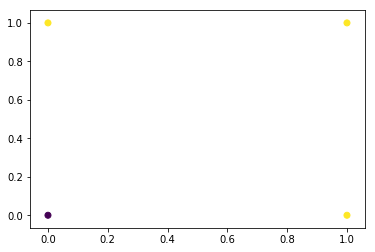

In [2]:
# Code here. Use additional text cells if required.
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,1])
plt.scatter(X[:,0], X[:,1], c = y)

In [16]:
def or_model(x1, x2):
    w = [-0.6,1,1]
    Z = w[0] + w[1]*x1 + w[2]*x2
    prob = 1/(1 + np.exp(-Z))
    if prob > 0.5:
        return 1
    else:
        return 0

In [17]:
y_pred = []
for x in X:
    pred = or_model(x[0], x[1])
    y_pred.append(pred)


No handles with labels found to put in legend.


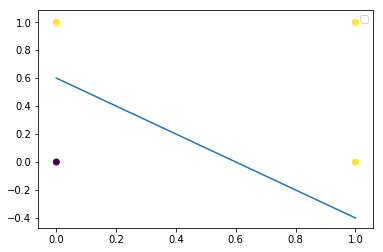

In [23]:
y_boundary = 0.6 - X[:,0]
labels = ['Class0', 'Class1']
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.legend()
plt.plot(X[:,0], y_boundary)

## Single-Layer Perceptron
---

 The following image represents the architecture of a single-layer perceptron.

![single-layer-perceptron](https://www.simplilearn.com/ice9/free_resources_article_thumb/general-diagram-of-perceptron-for-supervised-learning.jpg)

### 2) Now implement OR gate using a single-layer perceptron with step-function as activation. Specify one set of weights $w_1, w_2$ and bias $b$ that will perform this task. Plot the data points and the decision boundary, mention which class each decision region represents.<br>Note: You have to define the perceptron yourself, without using `scikit-learn`.

In [45]:
# Code here. Use additional text cells if required.
def step_function(z):
    if z > 0:
        return 1
    else:
        return 0
def or_perceptron(x):
    x = np.array(x)
    w = np.array([1,1])
    bias = -0.6
    z = bias + np.matmul(w, x.T)
    y_pred = step_function(z)
    return y_pred

In [46]:
or_perceptron(np.array([1,0]))

1

### 3) Do you observe any similarities between logistic regression and single-layer perceptron? What activation function should be used in the perceptron to get the same functionality as logistic regression?

Answer here.

- Using sigmoid activation function in the perceptron gives the same functionality as Logistic Regression.

### 4) Now implement AND gate using a single-layer perceptron with step-function as activation. Specify one set of weights $w_1, w_2$ and bias $b$ that will perform this task. Plot the data points and the decision boundary, mention which class each decision region represents.<br>Note: You have to define the perceptron yourself, without using `scikit-learn`.

In [63]:
# Code here. Use additional text cells if required.
def and_perceptron(x):
    x = np.array(x)
    w = np.array([1,1])
    bias = -1.6
    z = bias + np.matmul(w, x.T)
    y_pred = step_function(z)
    return y_pred

In [50]:
and_perceptron([0,1])

0

### 5) Can you construct an XOR gate similarly using a single-layer perceptron? Explain your answer.

- Xor cannot be seperated by a single linear decision boundary

## Multi-Layer Perceptron

---

The following image represents the architecture of a multi-layer perceptron with a singe hidden layer.
![alt text](https://missinglink.ai/wp-content/uploads/2018/11/multilayer-perceptron.png)
<br> Similarly we can introduce multiple hidden layers of different sizes to form a neural network.

### 6) Now implement XOR gate using a multi-layer perceptron with one hidden layer of two neurons and step function as activation, such that $\hat{y} = XOR(x_1, x_2)$ where $x_1$ and $x_2$ are boolean inputs to the gate and $\hat{y}$ is the boolean output from the gate.<br>Note: You have to define the perceptron yourself, without using `scikit-learn`. <br> <br> Plot and visualize the decision boundary for each neuron in the network (with respect to the inputs $x_1$ and $x_2$, in the same plot) and specify which class each region represents. <br> <br> Hint: Decompose the XOR gate into basic gates of OR, AND and NOT and manually define weights accordingly. (refer to the link provided in the reading material) 

In [69]:
# Code here. Use additional text cells if required.
def not_gate(z):
    if z == 1:
        return 0
    else:
        return 1
def XOR(x):
    x = np.array(x)
    z1 = or_perceptron(x)
    #print(z1)
    z2 = and_perceptron(x)
    #print(z2)
    z3 = not_gate(z2)
    #print(z3)
    pred = and_perceptron([z1,z3])
    return pred

In [70]:
print('X1: 0, X2: 0 -> ', XOR([0,0]))
print('X1: 0, X2: 1 -> ', XOR([0,1]))
print('X1: 1, X2: 0 -> ', XOR([1,0]))
print('X1: 1, X2: 1 -> ', XOR([1,1]))


X1: 0, X2: 0 ->  0
X1: 0, X2: 1 ->  1
X1: 1, X2: 0 ->  1
X1: 1, X2: 1 ->  0


### 7) From what you observed in the above exercises, explain what drawback of single-layer perceptron can be overcome by multi-layer perceptron using hidden layers.

- Multilayer perceptron can generalize better by using multiple functions as not always a single layer cannot define the underlying process.

## MLP Classification on Synthetic Dataset
---

### 8) Load the synthetic dataset from '`synth_data_train.npz`' and `'synth_data_test.npz'` containing train and test data. Visualize the data in a 2D plot. <br> Note: `mglearn.discrete_scatter(x1, x2, y)` from `mglearn` library provides good visualization

In [80]:
import mglearn

In [71]:
# Code here. Use additional text cells if required.
train = np.load('synth_data_train.npz')
test = np.load('synth_data_test.npz')

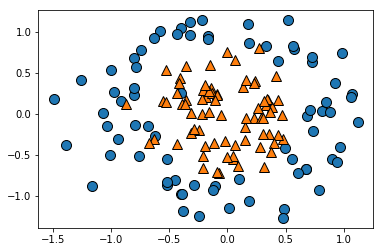

In [82]:
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])

### 9) Using `MLPClassifier` from `scikit-learn` library, fit a binary classifier to the given data. Use `max_iter=1000`, `random_state=0` and the rest as default parameters for the classifier.

### Visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier (in the same plot). <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### Report the train and test score of the above classifier on the given train and test data.

In [83]:
from sklearn.neural_network import MLPClassifier

In [84]:
# Code here. Use additional text cells if required.
mlp_model = MLPClassifier(max_iter = 1000, random_state = 0)
mlp_model.fit(train['X'], train['y'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

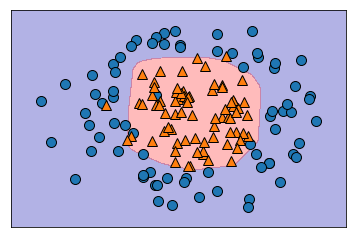

In [87]:
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(mlp_model, train['X'], fill = True, alpha = 0.3)

In [88]:
print('Train Score: ', mlp_model.score(train['X'], train['y']))
print('Test Score: ', mlp_model.score(test['X'], test['y']))

Train Score:  0.9533333333333334
Test Score:  0.8


### 10) Using `MLPClassifier`from `scikit-learn` library, fit a binary classifier to the given data, using a single hidden layer of size <br>(i) 2 (ii) 3 (iii) 5 (iv) 7 (v) 10 (vi) 15. <br>Use `max_iter=3000`, `random_state=0` and the rest as default parameters for the classifier.

### For each of the above cases, visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier. <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### For each of the above cases, report train and test score of the classifier on the given data.

Train Score:  0.6266666666666667
Test Score:  0.64


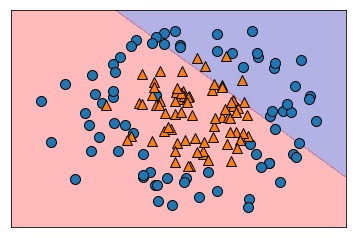

In [96]:
# Code here. Use additional text cells if required.
model1 = MLPClassifier(hidden_layer_sizes = (2), max_iter = 3000, random_state = 0)
model1.fit(train['X'], train['y'])
print('Train Score: ', model1.score(train['X'], train['y']))
print('Test Score: ', model1.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model1, train['X'],fill=True, alpha = 0.3)

Train Score:  0.6866666666666666
Test Score:  0.66


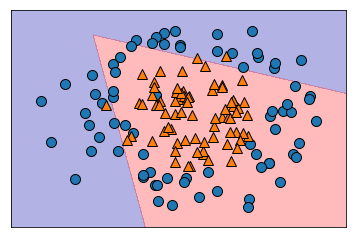

In [97]:
model2 = MLPClassifier(hidden_layer_sizes = (3), max_iter = 3000, random_state = 0)
model2.fit(train['X'], train['y'])
print('Train Score: ', model2.score(train['X'], train['y']))
print('Test Score: ', model2.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model2, train['X'],fill=True, alpha = 0.3)

Train Score:  0.7266666666666667
Test Score:  0.66


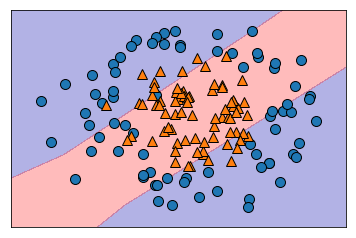

In [98]:
model3 = MLPClassifier(hidden_layer_sizes = (5), max_iter = 3000, random_state = 0)
model3.fit(train['X'], train['y'])
print('Train Score: ', model3.score(train['X'], train['y']))
print('Test Score: ', model3.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model3, train['X'],fill=True, alpha = 0.3)

Train Score:  0.92
Test Score:  0.82


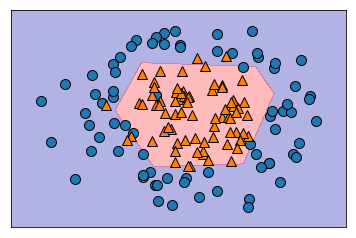

In [99]:
model4 = MLPClassifier(hidden_layer_sizes = (7), max_iter = 3000, random_state = 0)
model4.fit(train['X'], train['y'])
print('Train Score: ', model4.score(train['X'], train['y']))
print('Test Score: ', model4.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model4, train['X'],fill=True, alpha = 0.3)

Train Score:  0.94
Test Score:  0.86


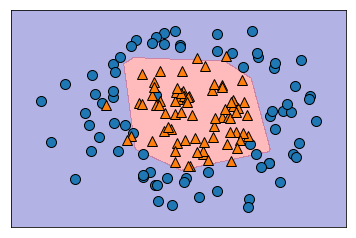

In [100]:
model5 = MLPClassifier(hidden_layer_sizes = (10), max_iter = 3000, random_state = 0)
model5.fit(train['X'], train['y'])
print('Train Score: ', model5.score(train['X'], train['y']))
print('Test Score: ', model5.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model5, train['X'],fill=True, alpha = 0.3)

Train Score:  0.96
Test Score:  0.82


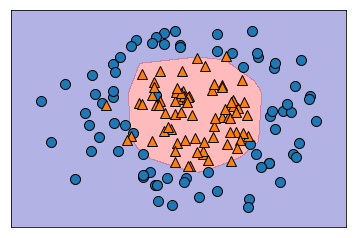

In [101]:
model6 = MLPClassifier(hidden_layer_sizes = (15), max_iter = 3000, random_state = 0)
model6.fit(train['X'], train['y'])
print('Train Score: ', model6.score(train['X'], train['y']))
print('Test Score: ', model6.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model6, train['X'],fill=True, alpha = 0.3)

### 11) Using `MLPClassifier`from `scikit-learn` library, fit a binary classifier to the given data, using <br>(a) one hidden layer of size 15 <br>(b) two hidden layers each of size 5 <br>(c) three hidden layers each of size 5. <br>Use `max_iter=2000`, `random_state=0` and the rest as default parameters for the classifier.

### For each of the above cases, visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier. <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### For each of the above cases, report train and test score of the classifier on the given data.

Train Score:  0.96
Test Score:  0.82


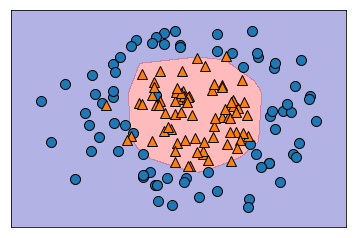

In [102]:
model7 = MLPClassifier(hidden_layer_sizes = (15), max_iter = 3000, random_state = 0)
model7.fit(train['X'], train['y'])
print('Train Score: ', model7.score(train['X'], train['y']))
print('Test Score: ', model7.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model7, train['X'],fill=True, alpha = 0.3)

Train Score:  0.9533333333333334
Test Score:  0.84


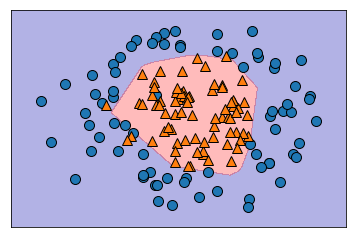

In [103]:
model8 = MLPClassifier(hidden_layer_sizes = (5,5), max_iter = 3000, random_state = 0)
model8.fit(train['X'], train['y'])
print('Train Score: ', model8.score(train['X'], train['y']))
print('Test Score: ', model8.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model8, train['X'],fill=True, alpha = 0.3)

Train Score:  0.9733333333333334
Test Score:  0.78


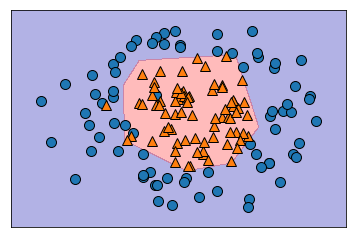

In [104]:
model9 = MLPClassifier(hidden_layer_sizes = (5,5,5), max_iter = 3000, random_state = 0)
model9.fit(train['X'], train['y'])
print('Train Score: ', model9.score(train['X'], train['y']))
print('Test Score: ', model9.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model9, train['X'],fill=True, alpha = 0.3)

### 12) From your observations in the above exercises, what is the effect of adding more hidden layers and how is it different from adding more neurons to the same hidden layer?

Answer here.

### Activation Functions<br>
The following image shows some basic and commonly used activation functions.
![alt text](https://www.kdnuggets.com/wp-content/uploads/activation.png)

### 13) Using `MLPClassifier`from `scikit-learn` library, fit a binary classifier to the given data, using one hidden layer of size 10 and activation function as <br>(a) identity <br>(b) sigmoid <br>(c) tanh <br>(d) relu. <br>Use `max_iter=2000`, `random_state=0` and the rest as default parameters for the classifier.

### For each of the above cases, visualize the decision boundary of the classifier in a 2D plot along with the train data points used to fit the classifier. <br> Note: `mglearn.plots.plot_2d_separator(classifier, X, fill=True, alpha=.3)` provides good visualization of the decision boundary

### For each of the above cases, report train and test score of the classifier on the given data.

Train Score:  0.5133333333333333
Test Score:  0.52


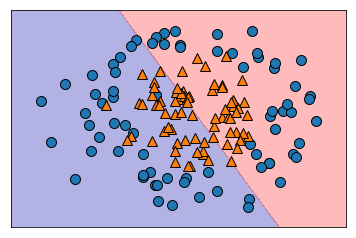

In [106]:
# Code here. Use additional text cells if required.
model10 = MLPClassifier(hidden_layer_sizes = (10), max_iter = 2000, random_state = 0, activation = 'identity')
model10.fit(train['X'], train['y'])
print('Train Score: ', model10.score(train['X'], train['y']))
print('Test Score: ', model10.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model10, train['X'],fill=True, alpha = 0.3)

Train Score:  0.64
Test Score:  0.6


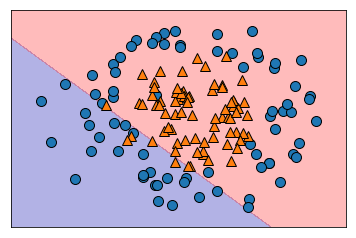

In [108]:
model11 = MLPClassifier(hidden_layer_sizes = (10), max_iter = 2000, random_state = 0, activation = 'logistic')
model11.fit(train['X'], train['y'])
print('Train Score: ', model11.score(train['X'], train['y']))
print('Test Score: ', model11.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model11, train['X'],fill=True, alpha = 0.3)

Train Score:  0.9466666666666667
Test Score:  0.82


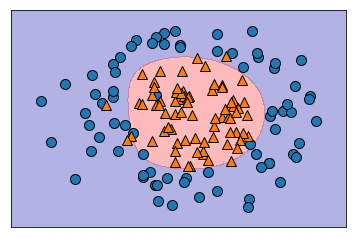

In [109]:
model12 = MLPClassifier(hidden_layer_sizes = (10), max_iter = 2000, random_state = 0, activation = 'tanh')
model12.fit(train['X'], train['y'])
print('Train Score: ', model12.score(train['X'], train['y']))
print('Test Score: ', model12.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model12, train['X'],fill=True, alpha = 0.3)

Train Score:  0.94
Test Score:  0.86


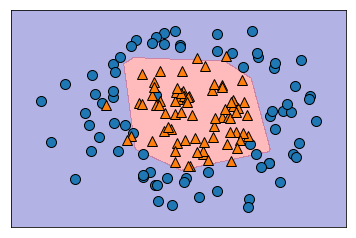

In [110]:
model13 = MLPClassifier(hidden_layer_sizes = (10), max_iter = 2000, random_state = 0, activation = 'relu')
model13.fit(train['X'], train['y'])
print('Train Score: ', model13.score(train['X'], train['y']))
print('Test Score: ', model13.score(test['X'], test['y']))
mglearn.discrete_scatter(train['X'][:,0], train['X'][:,1], train['y'])
mglearn.plots.plot_2d_separator(model13, train['X'],fill=True, alpha = 0.3)

### 14) Which activation function gives the best classifier for the given dataset and why? Are there any drawbacks in using the other activation functions?

Answer here.

## MLP Classification on MNIST Dataset
---

### 15) Load the MNIST dataset from `sklearn.datasets.fetch_openml`. Visualize the data.

In [ ]:
!conda update scikit-learn

In [ ]:
# Code here. Use additional text cells if required.
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist')


### 16) Fit an `MLPClassifier` with one hidden layer of 50 neurons (use `max_iter=20`, `alpha=1e-4`, `solver='sgd'`, `tol=1e-4`, `random_state=1`) <br> Visualize the weights of the hidden layer. <br>Hint: For each neuron in the hidden layer, reshape the weights to form a 28x28 grid and visualize them.

In [0]:
# Code here. Use additional text cells if required.

### 17) What patterns do you observe in the weights that you visualized? Explain why you think these patterns are formed?

Answer here.

### 18) Experiment with different parameters of the `MLPClassifier`. You can vary the number of hidden layers, number of neurons in each hidden layer and activation function used for the hidden layers. <br> Report the train and test scores and confusion matrix for each of the cases.

In [0]:
# Code here. Use additional text cells if required.

### 19) Which one of the above do you think is the optimal model? Give reasons. Report the train-test scores and confusion matrix.

Answer here.

In [0]:
# Code here. Use additional text cells if required.